## TASK-5

#### Get the current working directory

In [57]:
import os
import pandas as pd
PATH = os.getcwd()

#### Define the data path

In [2]:
DATA_PATH = os.path.join(PATH, 'data')
data_dir_list = os.listdir(DATA_PATH)

#### Get the list of folders inside data path

In [3]:
print(data_dir_list)

['CT_COVID', 'CT_NonCOVID']


#### Required variables declaration and initialization

In [4]:
img_rows=224
img_cols=224
num_channel=3

num_epoch=7
batch_size=32

img_data_list=[]
classes_names_list=[]

#### Read the images and store them in the list

In [5]:
import cv2

for dataset in data_dir_list:
    classes_names_list.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(DATA_PATH+'/'+ dataset)
    for img in img_list:
        input_img=cv2.imread(DATA_PATH + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img, (img_rows, img_cols))
        img_data_list.append(input_img_resize)

Loading images from CT_COVID folder

Loading images from CT_NonCOVID folder



#### Get the number of classes

In [6]:
num_classes = len(classes_names_list)
print(num_classes)

2


####  Image preprocessiong

In [7]:
import numpy as np

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

In [8]:
print (img_data.shape)

(746, 224, 224, 3)


In [10]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

#### Labelling target variable as class-0 & class-1 for Covid and Non-Covid respectively

In [11]:
classes = np.ones((num_of_samples,), dtype='int64')

classes[0:348]=0
classes[348:]=1


Convert class labels to numeric using on-hot encoding

In [12]:
from keras.utils import to_categorical

classes = to_categorical(classes, num_classes)

C:\Users\Sharo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Shuffle the dataset

In [13]:
from sklearn.utils import shuffle

X, Y = shuffle(img_data, classes, random_state=2)

#### Split the dataset

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
y_test.shape

(150, 2)

####  Defining the model

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

####  Compile the model

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

#### Model Summary

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 387200)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

#### Training/fit the model 

In [40]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 596 samples, validate on 150 samples
Epoch 1/7
596/596 [==============================] - 74s 124ms/step - loss: 0.3799 - accuracy: 0.8574 - val_loss: 0.5568 - val_accuracy: 0.7533
Epoch 2/7
596/596 [==============================] - 78s 131ms/step - loss: 0.2212 - accuracy: 0.9329 - val_loss: 0.6421 - val_accuracy: 0.7333
Epoch 3/7
596/596 [==============================] - 77s 129ms/step - loss: 0.2143 - accuracy: 0.9228 - val_loss: 0.9353 - val_accuracy: 0.7267
Epoch 4/7
596/596 [==============================] - 86s 144ms/step - loss: 0.1142 - accuracy: 0.9564 - val_loss: 0.9003 - val_accuracy: 0.7467
Epoch 5/7
596/596 [==============================] - 81s 136ms/step - loss: 0.3216 - accuracy: 0.9228 - val_loss: 0.7355 - val_accuracy: 0.7067
Epoch 6/7
596/596 [==============================] - 81s 136ms/step - loss: 0.0705 - accuracy: 0.9883 - val_loss: 1.2882 - val_accuracy: 0.6800
Epoch 7/7
596/596 [==============================] - 85s 143ms/step - loss: 0.0877 - accur

#### Evaluating the model

In [41]:
score = model.evaluate(X_test, y_test, batch_size=batch_size)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

150/150 [==============================] - 4s 24ms/step
Test Loss: 1.0195754154523213
Test Accuracy: 0.7200000286102295


#### Saving and loading model


In [42]:
model.save("model_test.hdf5")  #Saving Model

In [43]:
from keras.models import load_model  # Loading Model
model = load_model('model_test.hdf5')

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 387200)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

#### Uploading Single image and predicting using loaded model

Populating the interactive namespace from numpy and matplotlib


C:\Users\Sharo\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


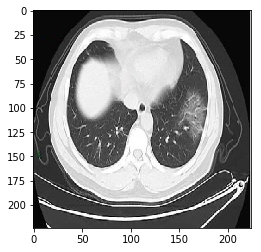

In [45]:
from keras.preprocessing import image
%pylab inline
import matplotlib.pyplot as plt

img = image.load_img('123.png', target_size=(img_rows, img_cols))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

imgplot = plt.imshow(img)
plt.show()

In [46]:
pred=model.predict(x)
clas= model.predict_classes(x)
print("The image predicted probability is: ", pred)
print("The given image belongs to class: {}".format(clas))



The image predicted probability is:  [[0. 1.]]
The given image belongs to class: [1]


### Testing from the dataset

In [47]:
test_image = X_test[0:20]
print (test_image.shape)

(20, 224, 224, 3)


In [48]:
print(model.predict(test_image))
print(model.predict_classes(test_image))


[[6.7532010e-02 9.3246800e-01]
 [1.0787813e-02 9.8921216e-01]
 [2.3975015e-01 7.6024991e-01]
 [2.4028665e-01 7.5971341e-01]
 [9.9896038e-01 1.0395981e-03]
 [9.9856997e-01 1.4299549e-03]
 [7.3393062e-11 1.0000000e+00]
 [9.9993205e-01 6.7985478e-05]
 [1.4938124e-02 9.8506194e-01]
 [1.0167240e-01 8.9832759e-01]
 [9.9999475e-01 5.2452210e-06]
 [2.7347487e-01 7.2652513e-01]
 [9.1778159e-01 8.2218386e-02]
 [5.2417904e-01 4.7582090e-01]
 [9.5567727e-01 4.4322781e-02]
 [9.8947841e-01 1.0521588e-02]
 [1.0395520e-07 9.9999988e-01]
 [9.9023598e-01 9.7639849e-03]
 [9.8380351e-01 1.6196536e-02]
 [9.5171583e-01 4.8284132e-02]]
[1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0]


###### From above, we can see that 1st image Belongs to class-1 while 5th image belongs to class-0, testing the same

In [49]:
# Tesing 1st image which belongs to class-1

test_image = X_test[0:1]
print (test_image.shape)
print(model.predict(test_image))
print("The given image belongs to class: ",model.predict_classes(test_image))

(1, 224, 224, 3)
[[0.06753203 0.932468  ]]
The given image belongs to class:  [1]


In [50]:
# Tesing 5th image which belongs to class-0

test_image = X_test[4:5]
print (test_image.shape)
print(model.predict(test_image))
print("The given image belongs to class: ",model.predict_classes(test_image))

(1, 224, 224, 3)
[[0.9989604  0.00103959]]
The given image belongs to class:  [0]


#### Predict and compute the confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)


In [52]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1
 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0
 0 0]


In [53]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

[[46 19]
 [23 62]]


### Experimental & Issues Faced - Organising folders

In [54]:
import os,shutil

In [55]:
sourcefile="C:/Users/Sharo/Dropbox/DATA SCIENCE/INTERNSHIP/TASK-5/data"

In [58]:
train= pd.read_excel('NonCOVID-CT-MetaInfo.xlsx',index_col=0) 

In [59]:
train.head(5)

,image_name,patient id
0,0.jpg,crawled_patient_0
1,1%0.jpg,crawled_patient_1
2,1%1.jpg,crawled_patient_1
3,1%2.jpg,crawled_patient_1
4,10%0.jpg,crawled_patient_10


In [61]:
patient_ids = list(train['patient id'].unique())

#### Total 171 unique patients are found and 171 folders has to be created

In [63]:
len(patient_ids)

171

#### Succesfully created seperate folders for each patient

In [66]:
for w in patient_ids:
  os.makedirs('./imgs/'+w)

##### individual folders, high quality image attached in the zip file

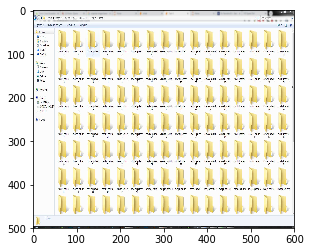

In [74]:
screen = image.load_img('folders.jpg', target_size=(500,600))
imgplot = plt.imshow(screen)
plt.show()

##### Using Shutil tried to move images to individual folders but was not able to move. It moved the source files both covid and non-covid image folders  to the destination folder but not patients images to individual folders.

In [77]:

for image in train.index:
  folder = train.loc[image, 'patient id']
  old = './imgs/{}'.format(image)
  new = './imgs/{}/{}'.format(folder, image)
  try:
    os.rename(old, new)
  except:
    print('{} - {}'.format(image,folder))
shutil.move(sourcefile, './imgs/')

0 - crawled_patient_0
1 - crawled_patient_1
2 - crawled_patient_1
3 - crawled_patient_1
4 - crawled_patient_10
5 - crawled_patient_10
6 - crawled_patient_10
7 - crawled_patient_11
8 - crawled_patient_11
9 - crawled_patient_11
10 - crawled_patient_12
11 - crawled_patient_13
12 - crawled_patient_14
13 - crawled_patient_14
14 - crawled_patient_14
15 - crawled_patient_14
16 - crawled_patient_15
17 - crawled_patient_15
18 - crawled_patient_15
19 - crawled_patient_15
20 - crawled_patient_16
21 - crawled_patient_17
22 - crawled_patient_17
23 - crawled_patient_18
24 - crawled_patient_18
25 - crawled_patient_18
26 - crawled_patient_18
27 - crawled_patient_19
28 - crawled_patient_19
29 - crawled_patient_2
30 - crawled_patient_2
31 - crawled_patient_2
32 - crawled_patient_2
33 - crawled_patient_20
34 - crawled_patient_21
35 - crawled_patient_21
36 - crawled_patient_22
37 - crawled_patient_22
38 - crawled_patient_25
39 - crawled_patient_25
40 - crawled_patient_25
41 - crawled_patient_25
42 - crawl

'./imgs/data'